In [1]:
from umap import UMAP
import hdbscan
from hdbscan import HDBSCAN
from pymethylprocess.MethylationDataTypes import MethylationArray
from pymethylprocess.general_machine_learning import MachineLearning
import pandas as pd, numpy as np
from sklearn.decomposition import PCA
import matplotlib, matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
sns.set()

# Load the Train/Test/Val Splitted Data

In [21]:
train_methyl_array=MethylationArray.from_pickle("train_test_val/train_methyl_array.pkl")
val_methyl_array=MethylationArray.from_pickle("train_test_val/val_methyl_array.pkl")
test_methyl_array=MethylationArray.from_pickle("train_test_val/test_methyl_array.pkl")

In [22]:
train_methyl_array.pheno

,X,Basename,AccNum,disease,Age,Sex,Tissue,Gran,CD4T,CD8T,Bcell,Mono,NK,gMDSC,filenames
GSM2334049_7766148058_R04C02,148,geo_idats/GSM2334049_7766148058_R04C02,GSM2334049,normal,26.0,Male,whole blood,-1.184292e-17,0.070349,0.235145,0.120445,0.0,0.094707,0.349221,geo_idats/GSM2334049_7766148058_R04C02
GSM2334354_7766148055_R03C02,450,geo_idats/GSM2334354_7766148055_R03C02,GSM2334354,normal,16.0,Male,whole blood,-1.909473e-17,0.044992,0.288297,0.118681,0.0,0.060615,0.347489,geo_idats/GSM2334354_7766148055_R03C02
GSM2334203_7512560144_R01C01,302,geo_idats/GSM2334203_7512560144_R01C01,GSM2334203,normal,47.0,Female,whole blood,-7.320042e-17,0.058330,0.262471,0.126595,0.0,0.074647,0.356432,geo_idats/GSM2334203_7512560144_R01C01
GSM2334201_9379082151_R03C01,300,geo_idats/GSM2334201_9379082151_R03C01,GSM2334201,normal,33.0,Female,whole blood,-1.461026e-17,0.046187,0.304625,0.138817,0.0,0.026608,0.332705,geo_idats/GSM2334201_9379082151_R03C01
GSM2333951_9370847092_R02C01,50,geo_idats/GSM2333951_9370847092_R02C01,GSM2333951,normal,91.0,Female,whole blood,-1.547598e-17,0.072917,0.260102,0.124447,0.0,0.074716,0.341815,geo_idats/GSM2333951_9370847092_R02C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2334568_7766148016_R03C01,664,geo_idats/GSM2334568_7766148016_R03C01,GSM2334568,normal,70.0,Female,whole blood,3.985352e-17,0.067596,0.252531,0.132265,0.0,0.074676,0.364164,geo_idats/GSM2334568_7766148016_R03C01
GSM2334592_7766148080_R03C01,688,geo_idats/GSM2334592_7766148080_R03C01,GSM2334592,normal,77.0,Male,whole blood,-1.539648e-17,0.077231,0.250249,0.123234,0.0,0.091781,0.344530,geo_idats/GSM2334592_7766148080_R03C01
GSM2334410_7512560102_R04C01,506,geo_idats/GSM2334410_7512560102_R04C01,GSM2334410,normal,56.0,Male,whole blood,-1.511709e-17,0.077745,0.219330,0.122297,0.0,0.099926,0.358989,geo_idats/GSM2334410_7512560102_R04C01
GSM2334216_9376538150_R04C02,314,geo_idats/GSM2334216_9376538150_R04C02,GSM2334216,normal,19.0,Female,whole blood,-1.703550e-17,0.080553,0.212659,0.119132,0.0,0.088879,0.358810,geo_idats/GSM2334216_9376538150_R04C02


In [23]:
train_methyl_array.beta

,cg14112997,cg02368820,cg16464924,cg11738485,cg19697575,cg24007926,cg11956442,cg10890644,cg00540295,cg14061270,...,cg24575128,cg02575448,cg14315334,cg10715905,cg12298697,cg06890747,cg11282353,cg25381017,cg07224147,cg01498829
GSM2334049_7766148058_R04C02,0.746772,0.137754,0.885510,0.677934,0.197647,0.199356,0.042319,0.798824,0.872111,0.146723,...,0.479666,0.265357,0.102241,0.769880,0.609081,0.248393,0.159256,0.483419,0.660894,0.516895
GSM2334354_7766148055_R03C02,0.048874,0.905374,0.979065,0.025636,0.924540,0.912879,0.627811,0.087247,0.874184,0.799230,...,0.434840,0.128507,0.139053,0.773491,0.636133,0.220135,0.144589,0.497033,0.663246,0.588631
GSM2334203_7512560144_R01C01,0.727274,0.149171,0.893120,0.023740,0.935229,0.193378,0.653166,0.083295,0.196360,0.225019,...,0.401557,0.104549,0.215812,0.742216,0.447609,0.310772,0.308128,0.501817,0.665693,0.568542
GSM2334201_9379082151_R03C01,0.075862,0.122626,0.129217,0.027082,0.871868,0.957665,0.954753,0.085400,0.839117,0.756796,...,0.355112,0.236041,0.071293,0.807055,0.563717,0.140359,0.136886,0.625264,0.654401,0.430838
GSM2333951_9370847092_R02C01,0.965005,0.119436,0.875369,0.024489,0.891426,0.912722,0.043833,0.694830,0.177408,0.197132,...,0.397389,0.315358,0.080356,0.733228,0.577166,0.305140,0.137443,0.497476,0.819438,0.439419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2334568_7766148016_R03C01,0.057092,0.835558,0.252645,0.024018,0.914744,0.912842,0.602661,0.723749,0.872359,0.852847,...,0.626323,0.352291,0.145856,0.645509,0.456014,0.363022,0.085593,0.387260,0.696345,0.640495
GSM2334592_7766148080_R03C01,0.774748,0.866476,0.986174,0.980951,0.209353,0.234648,0.063690,0.146543,0.831385,0.268850,...,0.407636,0.332948,0.090788,0.615199,0.446024,0.200829,0.201811,0.492432,0.730734,0.467250
GSM2334410_7512560102_R04C01,0.047447,0.956407,0.923706,0.647340,0.934047,0.188417,0.030754,0.067119,0.908819,0.788766,...,0.493190,0.211364,0.134264,0.750601,0.455709,0.293354,0.237672,0.535289,0.627210,0.591155
GSM2334216_9376538150_R04C02,0.210394,0.909898,0.365557,0.984893,0.208665,0.289453,0.647548,0.641735,0.169832,0.922223,...,0.390017,0.129174,0.244991,0.476823,0.538111,0.165073,0.110869,0.547653,0.842424,0.504991


In [25]:
umap = UMAP(n_components=100)
umap.fit(train_methyl_array.beta)
train_methyl_array.beta = pd.DataFrame(umap.transform(train_methyl_array.beta.values),index=train_methyl_array.return_idx())
val_methyl_array.beta = pd.DataFrame(umap.transform(val_methyl_array.beta),index=val_methyl_array.return_idx())
test_methyl_array.beta = pd.DataFrame(umap.transform(test_methyl_array.beta),index=test_methyl_array.return_idx())

In [26]:
def reduce_plot(data, labels, legend_title):
    np.random.seed(42)
    plt.figure(figsize=(8,8))
    t_data=pd.DataFrame(PCA(n_components=2).fit_transform(data),columns=['z1','z2'])
    t_data[legend_title]=labels
    sns.scatterplot('z1','z2',hue=legend_title, cmap=cubehelix_palette(as_cmap=True),data=t_data)

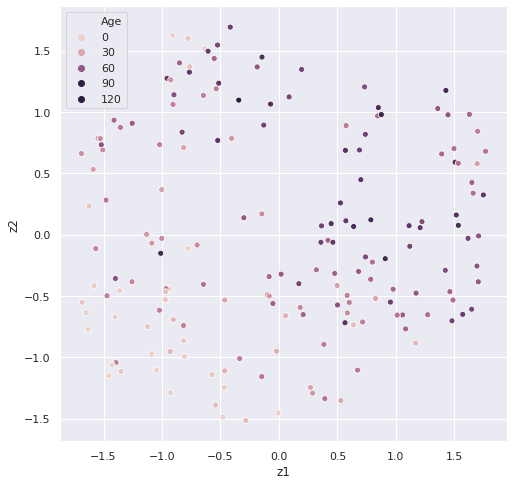

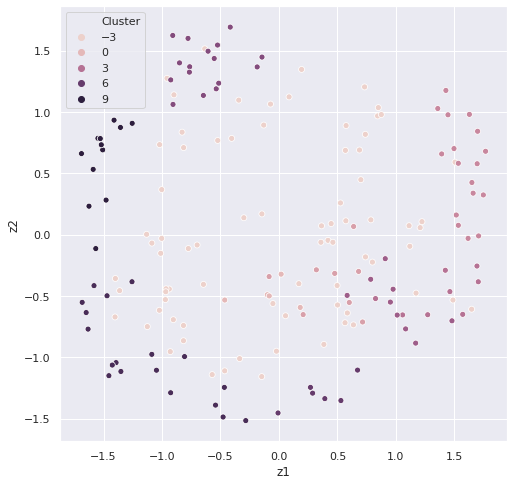

In [27]:
model = HDBSCAN(algorithm='best')
train_predicted_clusters = model.fit_predict(train_methyl_array.beta.astype(np.float64))
reduce_plot(train_methyl_array.beta, train_methyl_array.pheno['Age'].values,'Age')
reduce_plot(train_methyl_array.beta, train_predicted_clusters,'Cluster')

In [28]:
import tabulate
train_methyl_array.pheno['Cluster']=train_predicted_clusters
output_data=train_methyl_array.pheno.groupby('Cluster')['Age'].agg([np.mean,len])
print(tabulate.tabulate(output_data,headers='keys',tablefmt="pipe"))

|   Cluster |    mean |   len |
|----------:|--------:|------:|
|        -1 | 52.6623 |    77 |
|         0 | 40.6    |     5 |
|         1 | 55.75   |     8 |
|         2 | 59.5294 |    17 |
|         3 | 56.75   |     8 |
|         4 | 55.5556 |     9 |
|         5 | 52.625  |    16 |
|         6 | 34.3333 |     6 |
|         7 | 21.6111 |    18 |
|         8 | 42.4167 |    12 |


# Supervised Classification

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

y_pred = {}
scores={}
model=MachineLearning(RandomForestRegressor,options={})
model.fit(train_methyl_array,val_methyl_array, "Age")
y_pred['train']=model.predict(train_methyl_array)
y_pred['val']=model.predict(val_methyl_array)
y_pred['test']=model.predict(test_methyl_array)

scores['train']=r2_score(train_methyl_array.pheno['Age'],y_pred['train'])
scores['val']=r2_score(val_methyl_array.pheno['Age'],y_pred['val'])
scores['test']=r2_score(test_methyl_array.pheno['Age'],y_pred['test'])
scores

{'train': 0.9509464414204141,
 'val': 0.6072453677286369,
 'test': 0.5742228075970273}

(-0.5, 99.5, 0.0, 0.2871750771242062)

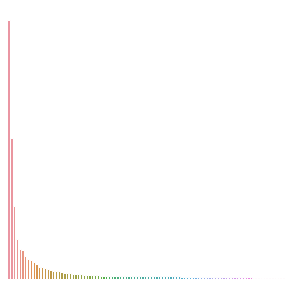

In [30]:
data=pd.DataFrame(model.model.feature_importances_,columns=['Importance'])
data=data.sort_values('Importance').iloc[::-1]
data['sample']=np.arange(len(data.index))

plt.figure(figsize=(5,5))
sns.barplot('sample','Importance',data=data)
plt.axis('off')

In [47]:
# get importance
importance = model.model.feature_importances_
importances = list(enumerate(importance))
importances.sort(key=lambda x:x[1], reverse = True)
top_n = importances[:20]
print("The 20 most important features for the RFR are:")
print()
print("feature      |  feature importance ")
print("-------------------------------------------")
for counter, entry in enumerate(top_n):
    feature = train_methyl_array.beta.columns[counter]
    #print(feature, " " * (26-len(feature)), "|      {:.9f}".format(entry[1]))
    print(feature, " " * (10-(feature//10)), "|      {:.9f}".format(entry[1]))

The 20 most important features for the RFR are:

feature      |  feature importance 
-------------------------------------------
0            |      0.273500073
1            |      0.148471238
2            |      0.077417241
3            |      0.042154879
4            |      0.031526653
5            |      0.030742337
6            |      0.023820518
7            |      0.020933113
8            |      0.019552068
9            |      0.018211930
10           |      0.015569753
11           |      0.012878420
12           |      0.012162899
13           |      0.010941555
14           |      0.010879950
15           |      0.009660434
16           |      0.008705797
17           |      0.008102467
18           |      0.007760523
19           |      0.006908410


In [61]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
y_pred2 = {}
scores2={}
model2=MachineLearning(SVR,options={"kernel": 'linear', "C":100})
model2.fit(train_methyl_array,val_methyl_array, "Age")
y_pred2['train']=model2.predict(train_methyl_array)
y_pred2['val']=model2.predict(val_methyl_array)
y_pred2['test']=model2.predict(test_methyl_array)

scores2['train']=r2_score(train_methyl_array.pheno['Age'],y_pred['train'])
scores2['val']=r2_score(val_methyl_array.pheno['Age'],y_pred['val'])
scores2['test']=r2_score(test_methyl_array.pheno['Age'],y_pred['test'])
scores2

{'train': 0.9509464414204141,
 'val': 0.6072453677286369,
 'test': 0.5742228075970273}

(-0.5, 99.5, 0.0, 0.17569437683735564)

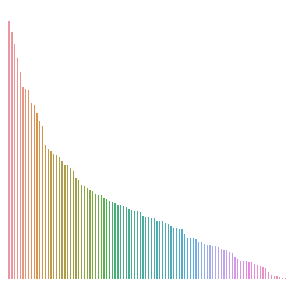

In [64]:
data=pd.DataFrame(abs(model.model.coef_[0]),columns=['Importance'])
data=data.sort_values('Importance').iloc[::-1]
data['sample']=np.arange(len(data.index))

plt.figure(figsize=(5,5))
sns.barplot('sample','Importance',data=data)
plt.axis('off')

In [58]:
# get importance
importance = model2.model.coef_[0]
importances = list(enumerate(importance))
importances.sort(key=lambda x:x[1], reverse = True)
top_n = importances[:20]
print("The 20 most important features for the SVM are:")
print()
print("feature      |  weights ")
print("-------------------------------------------")
for counter, entry in enumerate(top_n):
    feature = train_methyl_array.beta.columns[counter]
    #print(feature, " " * (26-len(feature)), "|      {:.9f}".format(entry[1]))
    print(feature, " " * (10-(feature//10)), "|      {:.9f}".format(entry[1]))

The 20 most important features for the SVM are:

feature      |  weights 
-------------------------------------------
0            |      0.167327978
1            |      0.152624025
2            |      0.124465398
3            |      0.122799810
4            |      0.099552217
5            |      0.087166288
6            |      0.080609126
7            |      0.079409383
8            |      0.070202612
9            |      0.065674033
10           |      0.061347672
11           |      0.059397157
12           |      0.052678699
13           |      0.049440725
14           |      0.048536444
15           |      0.047751784
16           |      0.044600136
17           |      0.041511478
18           |      0.040663677
19           |      0.040338010
